# Clasificación con regresión logística
## Primer conjunto de datos: frontera de decisión lineal.

Vamos a empezar con un primer conjunto. El fichero que contiene los datos es ejemplo-logistica-1.csv que se puede descargar del Aula Virtual y guardar en la carpeta data del directorio asociado a nuestro nuevo proyecto.

In [112]:
# Completar aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ROOT = Path("..") / ".."

datos = pd.read_csv(
    ROOT / "data" / "ejemplo-logistica-1.csv",
    sep=";"
)

# --------------------
datos

,x1,x2,y
0,1.33,2.65,0
1,1.86,3.42,0
2,2.86,1.92,0
3,4.54,4.77,0
4,1.01,0.59,0
...,...,...,...
995,3.88,3.88,0
996,3.18,0.35,0
997,1.41,1.20,0
998,0.96,1.21,0


El conjunto presenta dos características x1 y x2, que queremos usar para poder predecir la variable binaria y.


Llevad a cabo la representación gráfica del conjunto, usando un color distinto para distinguir entre los valores de y.

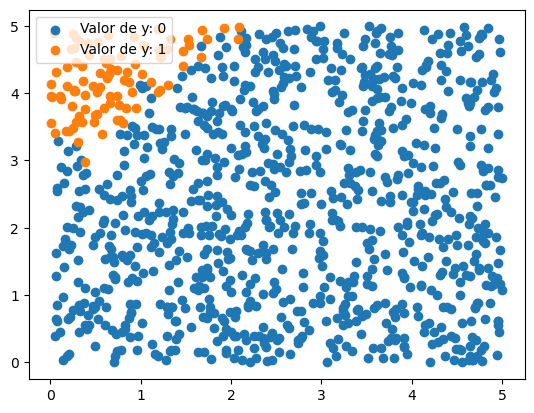

In [113]:
# Completar aquí 
fig, ax = plt.subplots()

zeros = datos.loc[datos["y"] == 0]
unos = datos.loc[datos["y"] == 1]

ax.scatter(
    zeros["x1"], zeros["x2"], label="Valor de y: 0"
)
ax.scatter(
    unos["x1"], unos["x2"], label="Valor de y: 1"
)

ax.legend()

# --------------------


Cúantos etiquetas de 0 y de 1 hay en el conjunto?


In [114]:
# Completar aquí
print(f"Hay {len(zeros)} '0's y {len(unos)} '1's, en total {len(datos)} datos")
# --------------------


Hay 907 '0's y 93 '1's, en total 1000 datos


## Ajuste paso a paso de una regresión logística.


En esta parte, vamos a aprender a ajustar una regresión logística a nuestros datos.
Lo hacemos usando en `sklearn` la clase `LogisticRegression` del súbmodulo `linear_model`

In [115]:
# Completar aquí: importar LogisticRegression
from sklearn.linear_model import LogisticRegression
# --------------------


Para ilustrar, vamos a ajustarlo sobre todo el conjunto. Después de definir `X` e `y`, instanciar el estimador dándole el nombre `log_reg`, y ajustarlo a los datos

In [116]:
# Completar aquí
X = datos[["x1", "x2"]]
y = datos["y"]
log_reg = LogisticRegression()

log_reg.fit(X, y)
# --------------------


LogisticRegression()

Podemos consultar los coeficientes y la ordenada con los atributos `coef_` y `intercept_`, al igual que lo hicimos para `LinearRegression`.

In [117]:
# Completar aquí:
print(f"Coeficientes {log_reg.coef_}, intercepto {log_reg.intercept_}")
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
# --------------------


Coeficientes [[-3.8593954  3.6923039]], intercepto [-10.54785398]


Deducir de estos valores la ecuación explícita de la recta que sirve de frontera de decisión para nuestro algoritmo

In [118]:
# Completar aquí
pendiente = -coef[0] / coef[1]
ordenada = -intercept / coef[1]
# --------------------
print(f'La pendiente es {pendiente:.3f} mientras que la ordenada al origen es {ordenada:.3f}.')

La pendiente es 1.045 mientras que la ordenada al origen es 2.857.


Usando `axline`, añadid a la gráfica la frontera de decisión

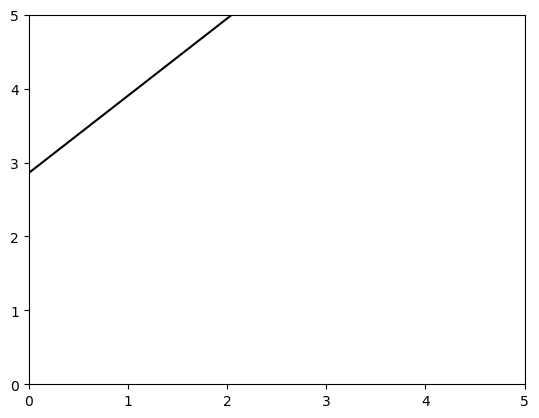

In [119]:
# Completar aquí
fig, ax = plt.subplots()

ax.axline(
    xy1=(0, ordenada),
    slope=pendiente,
    color="black"
)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5);
# --------------------


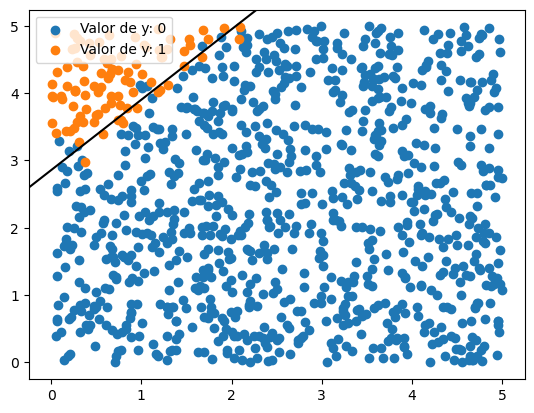

In [120]:
# Representamos todo junto

fig, ax = plt.subplots()

ax.scatter(
    zeros["x1"], zeros["x2"], label="Valor de y: 0"
)
ax.scatter(
    unos["x1"], unos["x2"], label="Valor de y: 1"
)
ax.axline(
    xy1=(0, ordenada),
    slope=pendiente,
    color="black"
)

ax.legend()

## Medidas de calidad del ajuste
Para medir la calidad de nuestro algoritmo, tal como lo vimos en la unidad anterior, podemos usar la validación cruzada, correspondiente a `cross_val_scores` del súbmodulo `model_selection`, pero esta vez, al ser el problema de clasificación, vamos a usar `scoring='accuracy'` que calcula el proporción de veces que la clasificación acierta.

Aplicar validación cruzada con 5 "folds" al conjunto, usando nuestro estimador `log_reg`, y guardar las puntuaciones en un objecto llamado `scores`.

In [121]:
# Completar aquí
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
# --------------------
scores

array([0.985, 0.975, 0.975, 0.99 , 0.975])

Los resultados son buenísimos, pero estos indicadores son demasiado sumarios. 
Imaginad que hubiéramos escogido como regla de clasificación que todos los datos son 0. Habríamos tenido un tasa de acierto de más del 90% que, a priori es muy buena!

Por ello, lo que se hace es, para empezar, comprobar la matriz de confusión, que nos dice cuántas veces hemos clasificado un 0 como un 1, un 0 como un 1, un 1 como un 0 y un 1 como un 1. En inglés corresponde a 

- TP: True Positive, los 1 clasificados como 1
- TN: True Negative, los 0 clasificados como 0
- FP: False Positivo, los 0 que hemos clasificado erróneamente como 1
- FN: False Negative, los 1 que hemos clasificado erróneamente como 0.

Para construir esta matriz, necesitamos las predicciones de cada individuo. Si queremos hacerlo con validación cruzada (lo recomendable), usamos `cross_val_predict` del súbmodulo `model_selection`. 
En la validación cruzada, por ejemplo con 5 folds, cada individuo entra 4 veces en un subconjunto de aprendizaje y sólo una vez en un subconjunto de tipo test, en el que se realiza la predicción. `cross_val_predict` devuelve el vector de los valores predichos durante el proceso de validación cruzada

Después de importar `cross_val_predict`, construir el vector `y_pred` que contenga los valores predichos durante el proceso de validación cruzada. [Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) de `cross_val_predict`.

In [122]:
# Completar aquí
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(log_reg, X, y, cv=5)
# --------------------


Podemos ahora calcular la matriz de confusión, importando `confusion_matrix` del submódulo `metrics`. [Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [123]:
# Completar aquí
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
# --------------------
cm

array([[900,   7],
       [ 13,  80]])

Deducid de esta matrix la precisión, es decir la tasa de Verdaderos Positivos (TP) respecto a todos los predichos como positivos, (TP + FP). Asignadla a un objeto que llamaremos `precision`

In [124]:
# Completar aquí
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
# --------------------
print(f'La precisión es : {precision:.3f}')

La precisión es : 0.920


Calculad la sensibilidad, es decir la tasa de individuos clasificados como Positivos (TP) respecto a auténticos positivos en el conjunto, (TP + FN). Asignadla a un objeto que llamaremos `sensibilidad`

In [125]:
# Completar aquí
sensibilidad = (cm[1, 1]) / (cm[1, 0] + cm[1, 1])
# --------------------
print(f'La sensibilidad es : {sensibilidad:.3f}')

La sensibilidad es : 0.860


Se pueden calcular automáticamente con `scikit-learn` usando `precision_score` y `recall_score` del submódulo `metrics`. Le pasamos como argumentos `y_pred` e `y`. Asignamos sus valores a `puntuacion_precision` y `puntuacion_recall`.

In [126]:
# Completar aquí
from sklearn.metrics import precision_score, recall_score
puntuacion_precision = precision_score(y, y_pred)
puntuacion_recall = recall_score(y, y_pred)


# --------------------
print(f'Los valores calculados usando precision_score y recall_score son: {puntuacion_precision:.2f} y {puntuacion_recall:.2f} respectivamente.')

Los valores calculados usando precision_score y recall_score son: 0.92 y 0.86 respectivamente.


## Clasificación de un nuevo individuo
Supongamos que tenemos un nuevo individuo cuyas características son `x1=3` y `x2=2`. Predecir la etiqueta de `y`, y calcular la probabilidad estimada asociada  que se obtiene con el método `predict_proba` que se aplica a nuestro estimador.

In [127]:
# Completar aquí
log_reg.predict_proba([[3, 2]])
# --------------------


/home/antonio/miniconda3/envs/ids/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99999604e-01, 3.96165899e-07]])

## Representación de la probabilidad predicha en función de los valores de `x1` y `x2`
Vamos a usar el método `predict_proba` para calcular la probabilidad asigna por nuestro modelo a los valores de la región y visualizarlos usando un mapa de calor.
Vamos a construir una rejilla de `n_puntos` por `n_puntos` en el rango de valores de `x1` y `x2`, y calcularemos para cada par de valores en la rejilla la probabilidad predicha por nuestro estimador. A continuación los representaremos usando el color para distinguir los valores de la probabilidad.
Situamos el código necesario en una función:

In [128]:
# Nada que completar
def visualizar_proba_pred(estimador, X, n_puntos=200):
    # Creamos la rejilla, usando mínimo y máximo de las columnas de X
    l_x1=X[:,0].min()
    r_x1=X[:,0].max()
    l_x2=X[:,1].min()
    r_x2=X[:,1].max()
    x1, x2 = np.meshgrid(
        np.linspace(l_x1, r_x1, n_puntos),
        np.linspace(l_x2, r_x2, n_puntos)
    )
    X_rejilla = np.array([x1.ravel(), x2.ravel()]).reshape(2, -1).T
    y_rejilla = estimador.predict_proba(X_rejilla)[:, 1]
    c = y_rejilla.reshape(n_puntos, n_puntos)
    l_c,r_c  = np.abs(c).min(), np.abs(c).max()
    figure, axes = plt.subplots()
    c = axes.pcolormesh(x1, x2, c, cmap='coolwarm', vmin=l_c, vmax=r_c, shading='auto')
    axes.set_title('Probabilidad estimada de que la etiqueta sea 1')
    axes.axis([l_x1, r_x1, l_x2, r_x2])
    figure.colorbar(c);

Representamos la visualización para nuestro modelo `log_reg` usando esta función

/home/antonio/miniconda3/envs/ids/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


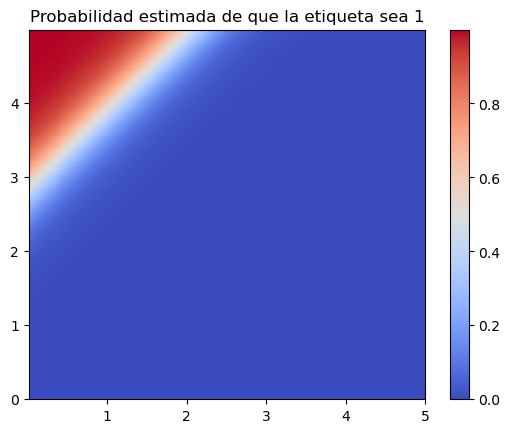

In [129]:
# Completar aquí
visualizar_proba_pred(log_reg, X.values, 200)
# --------------------


# Segundo ejemplo, frontera de decisión cuadrática
Descargad el fichero ejemplo-logistica-2.csv y cargadlo en un DataFrame llamado datos.
Representad `x2` frente a `x1`, distinguiendo según el valor de `y`.

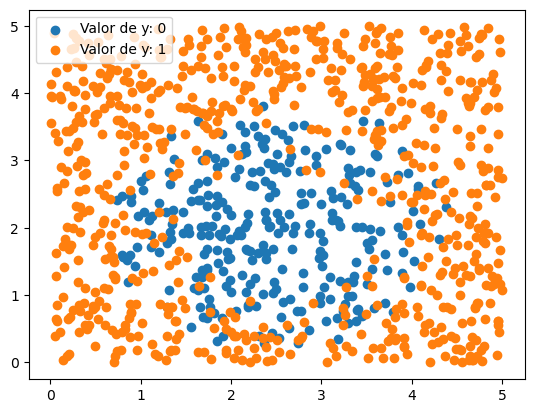

In [130]:
# Completar aquí
datos_2 = pd.read_csv(
    ROOT / "data" / "ejemplo-logistica-2.csv",
    sep=";"
)
fig, ax = plt.subplots()

x_0 = datos_2.loc[datos_2["y"] == 0]
x_1 = datos_2.loc[datos_2["y"] == 1]

ax.scatter(
    x_0["x1"], x_0["x2"], label="Valor de y: 0"
)
ax.scatter(
    x_1["x1"], x_1["x2"], label="Valor de y: 1"
)

ax.legend()


# --------------------


## Ajuste de una regresión logística con características polinomiales de grado 2.
Usando el transformador `PolynomialFeatures` del súbmodulo `preprocessing`, cread un pipeline que calcule los términos polinomiales de grado 2 y a continuación aplique una regresión lógistica.
> Usaremos el argumento `include_bias=False` en `PolynomialFeatures`, para que no añada una columna de 1 a nuestra matriz de características, puesto que la regresión logística ya se encarga de ello.

In [131]:
# Completar aquí
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
log_reg_poly = LogisticRegression()

pipe = Pipeline([
    ("poly", poly),
    ("log_reg", log_reg_poly)
])
# --------------------


Aplicadlo al conjunto de datos, definiendo `X` e `y`. Escribid la ecuación implícita de la frontera de la región de decisión.

In [132]:
# Completar aquí
X = datos_2[["x1", "x2"]]
y = datos_2["y"]
pipe.fit(X, y)


coef = log_reg_poly.coef_
intercept = log_reg_poly.intercept_
print(f"Coeficientes {coef}, intercepto {intercept}")
print(f"La ecuacion de la recta es '{intercept[0]:.3f} + {coef[0][0]:.2f}x1 + {coef[0][1]:.2f}x2 + {coef[0][2]:.2f}x1^2 + {coef[0][3]:.2f}x1x2 + {coef[0][4]:.2f}x2^2 = 0'")
# --------------------


Coeficientes [[-5.68181918 -4.55030303  1.23169349 -0.21354245  1.28125509]], intercepto [8.69183782]
La ecuacion de la recta es '8.692 + -5.68x1 + -4.55x2 + 1.23x1^2 + -0.21x1x2 + 1.28x2^2 = 0'


Obtened la matriz de confusión, después de usar validación cruzada para predecir los valores en el conjunto


In [133]:
# Completar aquí
y_pred = cross_val_predict(pipe, X, y, cv=5)
conf_mat_ploy = confusion_matrix(y, y_pred)
# --------------------
conf_mat_ploy

array([[219,  65],
       [ 51, 665]])

Finalmente, usad la función `visualizar_proba_pred` para visualizar la probabilidad predicha

/home/antonio/miniconda3/envs/ids/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


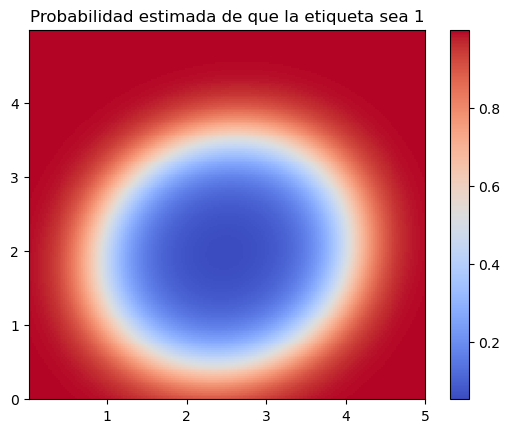

In [134]:
# completar aquí
visualizar_proba_pred(pipe, X.values)
# --------------------
